# 1. Import

In [1]:
# 연산 처리를 위한 패키지
import numpy as np
import pandas as pd
from pandas import DataFrame
from math import sqrt

# 데이터 분석을 위한 패키지
import statsmodels.api as sm

# 시각화를 위한 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 필요모듈 import
import os
import openpyxl
from datetime import datetime
from tqdm import tqdm

# 그래프를 실제로 그리기 위한 설정
%matplotlib inline

# 머신러닝 패키지
from catboost import CatBoostRegressor
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm.sklearn import LGBMRegressor
import random
import optuna
from optuna.samplers import TPESampler
import lightgbm as lgb

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import re
import optuna
from optuna.integration import XGBoostPruningCallback
sns.set_theme(style="darkgrid")


# KFold(CV), partial : optuna를 사용하기 위함
from sklearn.model_selection import KFold
from functools import partial

# 폰트 처리
# plt.rc('font', family='NanumGothic')        # for windows
plt.rc('font', family='AppleGothic') # For MacOS

import warnings
warnings.filterwarnings('ignore')

# 2.1. 데이터 로딩

In [2]:
# 뉴 데이터 로딩
test = pd.read_csv('data/final_test.csv', index_col = 0)             # unnamed_0 이라는 index가 추가되어 나오지 않게 'index_col = 0' 을 추가했습니다.
train = pd.read_csv('data/final_train.csv', index_col = 0)

submission = pd.read_csv('data/sample_submission.csv')

train2 = train.copy()
train.head()

,index,송하인_격자공간고유번호,송하인_격자공간명,송하인_시도코드,송하인_시도명,송하인_시군구코드,송하인_시군구명,수하인_격자공간고유번호,수하인_격자공간명,수하인_시도코드,수하인_시도명,수하인_시군구코드,수하인_시군구명,물품_카테고리,운송장_건수
0,0,5011000595017300,다나1395,50,제주특별자치도,50110,제주시,2871000192069300,다사1072,28,인천광역시,28710,강화군,음반,3
1,1,4148000690043300,다사2868,41,경기도,41480,파주시,5011000264024400,다다0901,50,제주특별자치도,50110,제주시,문화컨텐츠,3
2,2,5011000078068400,다다3007,50,제주특별자치도,50110,제주시,1120000007005400,다사5950,11,서울특별시,11200,성동구,농산물,3
3,3,4127100048006400,다사4521,41,경기도,41271,안산시상록구,5011000587019400,다나0595,50,제주특별자치도,50110,제주시,기타식품,7
4,4,5011000078068400,다다3007,50,제주특별자치도,50110,제주시,2823700010076300,다사3145,28,인천광역시,28237,부평구,농산물,3


In [3]:
def setting_data(train, test, one, two, three, four, five, six):
  test['송하인_격자공간고유번호'] = test['송하인_격자공간고유번호'].astype(str)
  test['수하인_격자공간고유번호'] = test['수하인_격자공간고유번호'].astype(str)
  train['송하인_격자공간고유번호'] = train['송하인_격자공간고유번호'].astype(str)
  train['수하인_격자공간고유번호'] = train['수하인_격자공간고유번호'].astype(str)

  train['송하인_코드1'] = train['송하인_격자공간고유번호'].str.slice(int(one),int(two))
  train['송하인_코드2'] = train['송하인_격자공간고유번호'].str.slice(int(two),int(three))
  train['송하인_코드3'] = train['송하인_격자공간고유번호'].str.slice(int(three),int(four))
  train['송하인_코드4'] = train['송하인_격자공간고유번호'].str.slice(int(four),int(five))
  train['송하인_코드5'] = train['송하인_격자공간고유번호'].str.slice(int(five),int(six))

  train['수하인_코드1'] = train['수하인_격자공간고유번호'].str.slice(int(one),int(two))
  train['수하인_코드2'] = train['수하인_격자공간고유번호'].str.slice(int(two),int(three))
  train['수하인_코드3'] = train['수하인_격자공간고유번호'].str.slice(int(three),int(four))
  train['수하인_코드4'] = train['수하인_격자공간고유번호'].str.slice(int(four),int(five))
  train['수하인_코드5'] = train['수하인_격자공간고유번호'].str.slice(int(five),int(six))

  test['송하인_코드1'] = test['송하인_격자공간고유번호'].str.slice(int(one),int(two))
  test['송하인_코드2'] = test['송하인_격자공간고유번호'].str.slice(int(two),int(three))
  test['송하인_코드3'] = test['송하인_격자공간고유번호'].str.slice(int(three),int(four))
  test['송하인_코드4'] = test['송하인_격자공간고유번호'].str.slice(int(four),int(five))
  test['송하인_코드5'] = test['송하인_격자공간고유번호'].str.slice(int(five),int(six))

  test['수하인_코드1'] = test['수하인_격자공간고유번호'].str.slice(int(one),int(two))
  test['수하인_코드2'] = test['수하인_격자공간고유번호'].str.slice(int(two),int(three))
  test['수하인_코드3'] = test['수하인_격자공간고유번호'].str.slice(int(three),int(four))
  test['수하인_코드4'] = test['수하인_격자공간고유번호'].str.slice(int(four),int(five))
  test['수하인_코드5'] = test['수하인_격자공간고유번호'].str.slice(int(five),int(six))

  train = train[['index', 
                  '송하인_코드1','송하인_시도명',
                  '송하인_코드2', '송하인_시군구명',
                  '송하인_코드3', '송하인_코드4', '송하인_코드5',
                  
                  '수하인_코드1', '수하인_시도명',
                  '수하인_코드2', '수하인_시군구명',
                  '수하인_코드3', '수하인_코드4', '수하인_코드5',
                  '물품_카테고리', 
                  '운송장_건수']]

  test = test[['index',
                '송하인_코드1','송하인_시도명',
                '송하인_코드2', '송하인_시군구명', 
                '송하인_코드3', '송하인_코드4', '송하인_코드5',

                '수하인_코드1', '수하인_시도명',
                '수하인_코드2', '수하인_시군구명',
                '수하인_코드3', '수하인_코드4', '수하인_코드5',
                '물품_카테고리',
                ]]
                
  return train, test


In [4]:
def confirm_nun(train):
  print('송하인 코드 1, 2, 3, 4, 5는 각각 ~ 종류의 코드가 존재합니다.')
  print('코드_1 :', train['송하인_코드1'].nunique())
  print('코드_2 :', train['송하인_코드2'].nunique())
  print('코드_3 :', train['송하인_코드3'].nunique())
  print('코드_4 :', train['송하인_코드4'].nunique())
  print('코드_5 :', train['송하인_코드5'].nunique())

  print("*"*50)

  print('수하인 코드 1, 2, 3, 4, 5는 각각 ~ 종류의 코드가 존재합니다.')
  print('코드_1 :', train['수하인_코드1'].nunique())
  print('코드_2 :', train['수하인_코드2'].nunique())
  print('코드_3 :', train['수하인_코드3'].nunique())
  print('코드_4 :', train['수하인_코드4'].nunique())
  print('코드_5 :', train['수하인_코드5'].nunique())

  print('*'*50)
  print('수하인_코드4의 고유값은')
  print(train['수하인_코드4'].unique())


In [5]:
train1, test1 = setting_data(train, test, '0', '2', '5', '8', '10', '16')       # 0, 2, 5, 9, 10, 16번째 위치에서 코드를 잘라서 저장합니다. 이걸로 결정
train2, test2 = setting_data(train, test, '0', '2', '5', '10', '11', '16')      # 0, 2, 5, 10, 11, 16번째 위치에서 코드를 잘라서 저장합니다.

### train3은 16자리중 15,16번째 숫자들을 쳐내는 과정입니다.
### 전부 00 이라는 값을 가지기 때문에 학습할 때 제거해도 상관없다고 생각합니다.

In [6]:
train1

,index,송하인_코드1,송하인_시도명,송하인_코드2,송하인_시군구명,송하인_코드3,송하인_코드4,송하인_코드5,수하인_코드1,수하인_시도명,수하인_코드2,수하인_시군구명,수하인_코드3,수하인_코드4,수하인_코드5,물품_카테고리,운송장_건수
0,0,50,제주특별자치도,110,제주시,005,95,017300,28,인천광역시,710,강화군,001,92,069300,음반,3
1,1,41,경기도,480,파주시,006,90,043300,50,제주특별자치도,110,제주시,002,64,024400,문화컨텐츠,3
2,2,50,제주특별자치도,110,제주시,000,78,068400,11,서울특별시,200,성동구,000,07,005400,농산물,3
3,3,41,경기도,271,안산시상록구,000,48,006400,50,제주특별자치도,110,제주시,005,87,019400,기타식품,7
4,4,50,제주특별자치도,110,제주시,000,78,068400,28,인천광역시,237,부평구,000,10,076300,농산물,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31679,31679,44,충청남도,710,금산군,002,90,087200,50,제주특별자치도,110,제주시,002,13,073200,스포츠잡화,3
31680,31680,11,서울특별시,290,성북구,000,14,045300,50,제주특별자치도,110,제주시,003,19,087100,스마트디바이스,4
31681,31681,11,서울특별시,290,성북구,000,14,045300,50,제주특별자치도,110,제주시,002,63,065200,스마트디바이스,6
31682,31682,41,경기도,273,안산시단원구,000,65,073100,50,제주특별자치도,110,제주시,002,64,061200,지갑,7


In [7]:
confirm_nun(train1)

송하인 코드 1, 2, 3, 4, 5는 각각 ~ 종류의 코드가 존재합니다.
코드_1 : 17
코드_2 : 99
코드_3 : 14
코드_4 : 100
코드_5 : 400
**************************************************
수하인 코드 1, 2, 3, 4, 5는 각각 ~ 종류의 코드가 존재합니다.
코드_1 : 17
코드_2 : 101
코드_3 : 18
코드_4 : 100
코드_5 : 400
**************************************************
수하인_코드4의 고유값은
['92' '64' '07' '87' '10' '14' '69' '17' '23' '26' '16' '20' '63' '02'
 '27' '21' '96' '09' '48' '31' '03' '18' '06' '39' '24' '55' '04' '33'
 '35' '72' '56' '79' '30' '12' '59' '99' '41' '15' '62' '73' '32' '65'
 '70' '82' '74' '94' '46' '19' '78' '29' '52' '25' '85' '42' '13' '01'
 '08' '28' '05' '90' '53' '60' '66' '11' '77' '88' '00' '67' '98' '54'
 '44' '37' '36' '38' '81' '84' '58' '34' '68' '40' '57' '71' '83' '45'
 '49' '76' '47' '51' '43' '93' '61' '22' '86' '95' '50' '75' '97' '89'
 '91' '80']


In [8]:
print('*'*50)
print('수하인_코드2의 고유값은')
print(test1['수하인_코드2'].unique())

**************************************************
수하인_코드2의 고유값은
['110' '260' '130' '710' '480' '350' '465' '200' '210' '185' '173' '170'
 '570' '560' '440' '810' '470' '113' '237' '410' '390' '650' '590' '800'
 '500' '380' '900' '790' '360' '140' '430' '320' '680' '463' '111' '545'
 '770' '290' '780' '610' '150' '190' '285' '820' '330' '305' '230' '530'
 '135' '197' '310' '287' '270' '370' '131' '281' '450' '133' '750' '280'
 '740' '117' '180' '880' '220' '620' '199' '125' '830' '245' '250' '760'
 '129' '273' '155' '121' '115' '271' '850' '840' '550' '215' '195' '127'
 '123' '730' '461' '670' '630' '171' '870' '720' '890' '910' '240' '825'
 '860' '930' '745' '940' '920']


In [9]:
'''
종로구 : 110
중구 : 140
용산구 : 170
성동구 : 200
광진구 : 215
동대문구 : 230
중랑구 : 260
성북구 : 290
'''
train1[(train1['송하인_시군구명']=='강남구')&(train1['송하인_시도명']=='서울특별시')]

,index,송하인_코드1,송하인_시도명,송하인_코드2,송하인_시군구명,송하인_코드3,송하인_코드4,송하인_코드5,수하인_코드1,수하인_시도명,수하인_코드2,수하인_시군구명,수하인_코드3,수하인_코드4,수하인_코드5,물품_카테고리,운송장_건수
210,210,11,서울특별시,680,강남구,000,07,002200,50,제주특별자치도,110,제주시,003,73,011400,선글라스/안경테,3
213,213,11,서울특별시,680,강남구,000,15,064300,50,제주특별자치도,110,제주시,002,66,003200,기타화장품/미용,3
505,505,11,서울특별시,680,강남구,000,12,065400,50,제주특별자치도,110,제주시,003,19,002300,상의,3
750,750,11,서울특별시,680,강남구,000,10,070300,50,제주특별자치도,110,제주시,002,13,022200,상의,4
881,881,11,서울특별시,680,강남구,000,12,071300,50,제주특별자치도,130,서귀포시,006,22,057100,농산물,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30659,30659,11,서울특별시,680,강남구,000,16,020100,50,제주특별자치도,130,서귀포시,005,79,077400,기타패션의류,3
30806,30806,11,서울특별시,680,강남구,000,11,040100,50,제주특별자치도,110,제주시,002,66,031300,다이어트식품,5
31514,31514,11,서울특별시,680,강남구,000,32,011100,50,제주특별자치도,110,제주시,003,74,015300,기타패션의류,4
31599,31599,11,서울특별시,680,강남구,000,11,068300,50,제주특별자치도,110,제주시,002,66,060300,주얼리,4


In [10]:
# train1(5416), train2(5416)으로 나눠서 각자 고유값들을 확인해봤는데요,
# 5515의 경우 1부분이 [0,1]만 존재하는걸로 봐서, 맨 뒷자리 5와 이어진다고 생각했습니다
# 99999에서 100000 으로 넘어가기 때문에 이런식으로 나왔다고 생각했고,
# 우리나라 좌표에 고유번호를 50미터 단위로 지정을 했기 때문에, 정사각형 격자를 만들려면 제곱수가 나와야 한다고 생각했습니다.
# 때문에 6자리수 안에 들어갈 수 있는 데이터는 100만개로 제곱수이며, 5자리수 안에 들어갈 수 있는 데이터는 10만개로 제곱수가 되지 않아 합리적인 수가 아니라고 생각했습니다.
# 또, 6자리수 맨 뒷자리 2자리는 모두 00이어서, 4자리수만 데이터에 의미가 있는 것으로 보입니다. 
# 우리는 5 4 1 6(4) 단위로 끊어서 데이터를 분석하기로 했습니다.

In [11]:
train = train1[['물품_카테고리', '송하인_코드1', '송하인_코드2', '송하인_코드3', '송하인_코드4','송하인_코드5', '수하인_코드1', '수하인_코드2', '수하인_코드3', '수하인_코드4', '수하인_코드5', '운송장_건수']]
test = test1[['물품_카테고리', '송하인_코드1', '송하인_코드2', '송하인_코드3', '송하인_코드4','송하인_코드5', '수하인_코드1', '수하인_코드2', '수하인_코드3', '수하인_코드4', '수하인_코드5']]


In [12]:
train

,물품_카테고리,송하인_코드1,송하인_코드2,송하인_코드3,송하인_코드4,송하인_코드5,수하인_코드1,수하인_코드2,수하인_코드3,수하인_코드4,수하인_코드5,운송장_건수
0,음반,50,110,005,95,017300,28,710,001,92,069300,3
1,문화컨텐츠,41,480,006,90,043300,50,110,002,64,024400,3
2,농산물,50,110,000,78,068400,11,200,000,07,005400,3
3,기타식품,41,271,000,48,006400,50,110,005,87,019400,7
4,농산물,50,110,000,78,068400,28,237,000,10,076300,3
...,...,...,...,...,...,...,...,...,...,...,...,...
31679,스포츠잡화,44,710,002,90,087200,50,110,002,13,073200,3
31680,스마트디바이스,11,290,000,14,045300,50,110,003,19,087100,4
31681,스마트디바이스,11,290,000,14,045300,50,110,002,63,065200,6
31682,지갑,41,273,000,65,073100,50,110,002,64,061200,7


In [13]:
for col in test.columns:
  train[col]=train[col].astype('category')
  test[col]=test[col].astype('category')

In [14]:
mean_target_encoding_columns = list(train.drop(columns = ['운송장_건수']).columns)
med = train['운송장_건수'].median() # 운송장_건수에는 이상치가 상당히 존재하기 때문에, median으로 채워준다.


In [15]:
for column in mean_target_encoding_columns :  
    new_column = 'Mean_' + column
    dic = train.groupby(column)['운송장_건수'].agg('mean').to_dict()
    train[new_column] = train[column].map(dic)
    test[new_column] = test[column].map(dic)


In [16]:
test.isnull().sum()

물품_카테고리         0
송하인_코드1         0
송하인_코드2         0
송하인_코드3         0
송하인_코드4         0
송하인_코드5         0
수하인_코드1         0
수하인_코드2         0
수하인_코드3         0
수하인_코드4         0
수하인_코드5         0
Mean_물품_카테고리    0
Mean_송하인_코드1    0
Mean_송하인_코드2    1
Mean_송하인_코드3    0
Mean_송하인_코드4    0
Mean_송하인_코드5    0
Mean_수하인_코드1    0
Mean_수하인_코드2    0
Mean_수하인_코드3    0
Mean_수하인_코드4    0
Mean_수하인_코드5    0
dtype: int64

In [17]:
test['Mean_송하인_코드2'] = test['Mean_송하인_코드2'].fillna(med)       # 평균값으로 송하인코드 채워줌

In [18]:
test.isnull().sum()

물품_카테고리         0
송하인_코드1         0
송하인_코드2         0
송하인_코드3         0
송하인_코드4         0
송하인_코드5         0
수하인_코드1         0
수하인_코드2         0
수하인_코드3         0
수하인_코드4         0
수하인_코드5         0
Mean_물품_카테고리    0
Mean_송하인_코드1    0
Mean_송하인_코드2    0
Mean_송하인_코드3    0
Mean_송하인_코드4    0
Mean_송하인_코드5    0
Mean_수하인_코드1    0
Mean_수하인_코드2    0
Mean_수하인_코드3    0
Mean_수하인_코드4    0
Mean_수하인_코드5    0
dtype: int64

In [19]:
train.drop(columns = ['물품_카테고리', '송하인_코드1', '송하인_코드2', '송하인_코드3', '송하인_코드4', '송하인_코드5', '수하인_코드1', '수하인_코드2', '수하인_코드3', '수하인_코드4', '수하인_코드5'], inplace = True)
test.drop(columns = ['물품_카테고리', '송하인_코드1', '송하인_코드2', '송하인_코드3', '송하인_코드4', '송하인_코드5', '수하인_코드1', '수하인_코드2', '수하인_코드3', '수하인_코드4', '수하인_코드5'], inplace = True)

In [21]:
categorical_features = train.columns[1:11]
categorical_features

Index(['Mean_물품_카테고리', 'Mean_송하인_코드1', 'Mean_송하인_코드2', 'Mean_송하인_코드3',
       'Mean_송하인_코드4', 'Mean_송하인_코드5', 'Mean_수하인_코드1', 'Mean_수하인_코드2',
       'Mean_수하인_코드3', 'Mean_수하인_코드4'],
      dtype='object')

In [22]:
temp = train.columns[12:]
temp

Index([], dtype='object')

In [23]:
card1 = train.columns[train.nunique() == 1]
card1

Index([], dtype='object')

In [24]:
binary_features = np.setdiff1d(temp, card1)
print("%d features - %d features = %d binary features" % (len(temp), len(card1), len(binary_features)))

0 features - 0 features = 0 binary features


In [26]:
# feature engineering을 위해 tempX, y 생성
total = pd.concat([train, test])
split_point = len(train)
y = train.운송장_건수
tempX = total.drop(columns=["운송장_건수"])
tempX = tempX.drop(columns=card1)
trainX = tempX[:split_point]
testX = tempX[split_point:]
print(trainX.shape, testX.shape, y.shape)

(31684, 11) (7920, 11) (31684,)


In [27]:
trainX # sponge

,Mean_물품_카테고리,Mean_송하인_코드1,Mean_송하인_코드2,Mean_송하인_코드3,Mean_송하인_코드4,Mean_송하인_코드5,Mean_수하인_코드1,Mean_수하인_코드2,Mean_수하인_코드3,Mean_수하인_코드4,Mean_수하인_코드5
0,4.092014,4.542944,4.619105,5.601262,4.296642,4.176012,4.295646,5.185819,5.016543,4.327434,6.581197
1,4.976169,5.691149,5.396163,4.309254,5.068776,4.147287,5.834601,5.811388,5.685248,5.628647,4.416667
2,4.322081,4.542944,4.619105,4.752646,3.840566,3.721396,4.338287,4.303243,4.429670,4.620209,4.074627
3,6.088825,5.691149,4.972973,4.752646,4.588889,4.471910,5.834601,5.811388,5.274067,4.307692,5.153846
4,4.322081,4.542944,4.619105,4.752646,3.840566,3.721396,4.295646,4.214660,4.429670,4.134259,5.254237
...,...,...,...,...,...,...,...,...,...,...,...
31679,3.250000,8.516588,6.765363,5.290879,5.068776,10.384615,5.834601,5.811388,5.685248,4.997406,6.011628
31680,4.428571,5.445993,4.916201,4.752646,5.380822,5.333333,5.834601,5.811388,5.578444,4.980938,4.300000
31681,4.428571,5.445993,4.916201,4.752646,5.380822,5.333333,5.834601,5.811388,5.685248,4.875000,4.363636
31682,4.400000,5.691149,4.784314,4.752646,4.841035,4.662791,5.834601,5.811388,5.685248,5.628647,6.187500


In [28]:
testX

,Mean_물품_카테고리,Mean_송하인_코드1,Mean_송하인_코드2,Mean_송하인_코드3,Mean_송하인_코드4,Mean_송하인_코드5,Mean_수하인_코드1,Mean_수하인_코드2,Mean_수하인_코드3,Mean_수하인_코드4,Mean_수하인_코드5
0,24.000000,5.691149,4.040000,5.601262,4.980322,7.833333,5.834601,5.811388,4.879265,4.641723,4.541667
1,9.714286,5.445993,5.468085,4.752646,5.937500,4.454545,5.834601,5.811388,5.016543,4.930233,5.873418
2,7.166667,5.691149,5.041322,5.843378,5.265306,4.600000,5.834601,5.811388,5.578444,4.456140,4.840426
3,5.500000,4.542944,4.619105,4.558929,4.845361,5.109244,4.295646,4.298165,4.429670,5.614943,4.246914
4,4.090909,5.691149,5.587224,5.290879,5.939759,5.293333,5.834601,5.811388,5.016543,5.264045,5.013158
...,...,...,...,...,...,...,...,...,...,...,...
7915,4.322081,4.542944,4.619105,5.290879,5.677656,5.597938,4.852695,4.643258,4.879265,4.680261,5.147727
7916,4.976169,5.445993,5.162162,4.752646,4.960177,5.571429,5.834601,5.811388,5.685248,5.628647,5.197368
7917,4.322081,4.542944,4.474712,4.309254,3.824703,3.663952,4.338287,4.180505,4.429670,5.651840,4.264706
7918,4.322081,4.542944,4.474712,4.309254,3.824703,3.663952,4.692464,4.439509,4.429670,4.404580,6.315068


In [29]:
# 1. correlation

# 중복정보가 있는 column 제거하기 위해 상관계수를 확인해봅니다.
def remove_collinearity(X, threshold):
    """
    X : feature matrix
    threshold : 다중공선성을 제거할 column을 고르는 기준 값. [0, 1]
    """
    
    corr = X.corr()
    candidate_cols = []
    
    for x in corr.iterrows():
        idx, row = x[0], x[1] # decoupling tuple
        # 해당 row는 이미 처리가 되어서 볼 필요가 없다.
        if idx in candidate_cols:
            continue
        #print(row[row > 0.7].index[1:])
        candidates = row[row > threshold].index[1:]

        # 자기 자신을 제외하고 threshold를 넘는 column이 있다면,
        if len(candidates) != 0:
            for col in candidates:
                candidate_cols.append(col)           
    
    return candidate_cols

def find_feature_importance(X, model, show_plot):

    feat_names = X.columns.values
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    indices = np.argsort(importances)[::-1][:20]

    plt.figure(figsize=(12,12))
    plt.title("Feature importances")
    plt.bar(range(len(indices)), importances[indices], color="r", align="center")
    plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
    plt.xlim([-1, len(indices)])
    plt.show()
    
    important_features = X.columns[importances >= 0.005]
    return important_features
    
def apply_PCA(X, show_plot):
    from sklearn.decomposition import PCA
    # training data와 test data를 모두 PCA를 이용하여 차원 감소를 수행합니다.
    pca = PCA(n_components=0.90) # 원래 데이터의 90%를 보존하는 차원.
    pca_090 = pca.fit(X) # 학습 및 변환
    reduced_X = pca_090.transform(X)
    print(reduced_X.shape)
    
    if show_plot:
        labels = [f"PC{x}" for x in range(1, reduced_X.shape[1]+1)]
        pca_090_variance = np.round(pca_090.explained_variance_ratio_.cumsum()*100, decimals=1)
        plt.figure(figsize=(25,5))
        plt.bar(x=range(1, len(pca_090_variance)+1), height=pca_090_variance, tick_label=labels)

        plt.xticks(rotation=90, color='indigo', size=15)
        plt.yticks(rotation=0, color='indigo', size=15)
        plt.title('Scree Plot',color='tab:orange', fontsize=25)
        plt.xlabel('Principal Components', {'color': 'tab:orange', 'fontsize':15})
        plt.ylabel('Cumulative percentage of explained variance ', {'color': 'tab:orange', 'fontsize':15})
        plt.show()
        
        X_train_pca_df = pd.DataFrame(reduced_X, columns=labels)
        display(X_train_pca_df)

    return pca_090, X_train_pca_df

In [30]:
# flag setting
feature_reducing = "PCA" # "correlation" / "feature_importance" / "PCA"

(31684, 6)


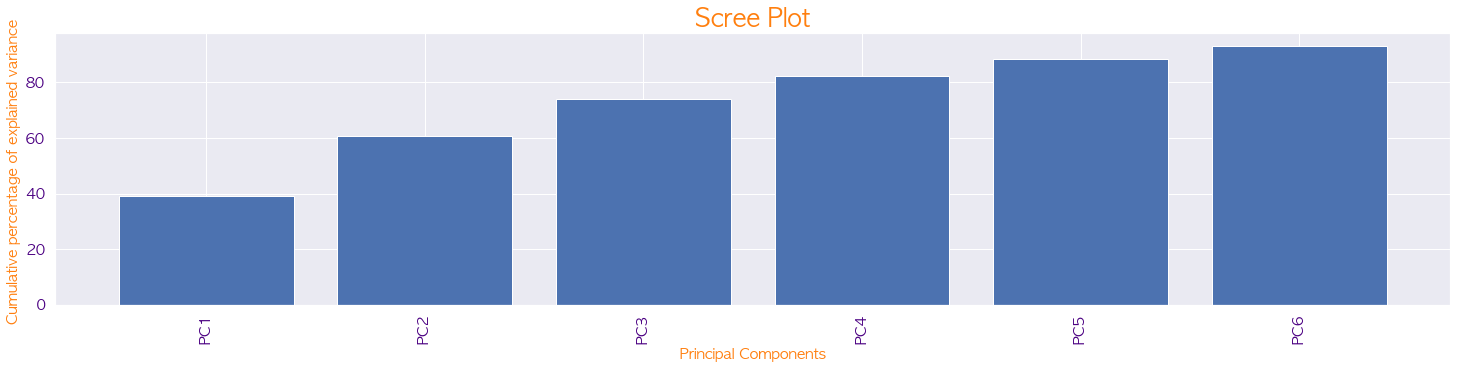

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.018741,0.269968,-0.561594,0.042613,-0.022465,1.729836
1,0.234280,0.956875,0.924096,-0.392008,-1.549895,-0.493734
2,-1.593054,0.642852,-0.634884,0.515105,0.474143,-0.752249
3,0.347945,0.430400,1.525483,0.585235,-0.912999,0.188869
4,-1.598835,0.626888,-0.672327,0.546742,0.618809,0.422086
...,...,...,...,...,...,...
31679,5.249480,-1.572496,-2.356327,-0.098896,-3.394073,0.956315
31680,0.646925,-0.204965,0.164076,-0.675092,-1.445645,-0.617274
31681,0.650639,-0.205139,0.168544,-0.676019,-1.456166,-0.555470
31682,0.076607,0.201937,0.408436,-0.326281,-1.885060,1.278188


(31684, 6)


In [31]:
# PCA 적용
if feature_reducing == "correlation":
    threshold = 0.7
    correlated_features = remove_collinearity(trainX, threshold)
    correlated_features = set(correlated_features) # 중복 제거
    print("%d Correlation features over %.2f" % (len(correlated_features), threshold))
    
    X = trainX.drop(columns=correlated_features)
    print(X.shape)
    
elif feature_reducing == "feature_importance":
    show_plot = True
    model = RandomForestRegressor(max_features="sqrt", n_jobs=-1, random_state=0xC0FFEE)
    model.fit(trainX, y)
    important_features = find_feature_importance(trainX, model, show_plot)
    X = trainX[important_features]
    print(X.shape)
    
elif feature_reducing == "PCA":
    show_plot = True
    pca_model, X = apply_PCA(trainX, show_plot)
    print(X.shape)

In [32]:
# 첫번째 테스트용으로 사용하고, 실제 학습시에는 K-Fold CV를 사용합니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0xC0FFEE)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28515, 6) (3169, 6) (28515,) (3169,)


In [33]:
def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

def rmse_cv(model):
    # cv별로 학습하는 함수
    tscv = TimeSeriesSplit(n_splits=10)
    rmse_list = []
    model_name = model.__class__.__name__
    for _, (train_index, test_index) in tqdm(enumerate(tscv.split(X_train), start=1), desc=f'{model_name} Cross Validations...', total=10):
        train_X, test_X = X_train.iloc[train_index], X_train.iloc[test_index]
        train_y, test_y = y_train.iloc[train_index], y_train.iloc[test_index]
        clf = model.fit(train_X, train_y)
        pred = clf.predict(test_X)
        rmse = RMSE(test_y, pred) 
        rmse_list.append(rmse)
    return model_name, rmse_list

def print_rmse_score(model):
    # cv별 프린팅, 평균 저장
    model_name, score = rmse_cv(model)
    for i, r in enumerate(score, start=1):
        print(f'{i} FOLDS: {model_name} RMSLE: {r:.4f}')
    print(f'\n{model_name} mean RMSLE: {np.mean(score):.4f}')
    print('='*40)
    return model_name, np.mean(score)

In [34]:
reg = LinearRegression(n_jobs=-1)
ridge = Ridge(alpha=0.8, random_state=1)
lasso = Lasso(alpha = 0.01, random_state=1)
DTree = DecisionTreeRegressor(max_depth=6, min_samples_split=10, min_samples_leaf=15, random_state=1)
rf = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=9, min_samples_split=50,
                           min_samples_leaf=5, random_state=1, n_jobs=-1)
model_xgb = xgb.XGBRegressor(n_estimators=500, max_depth=9, min_child_weight=5, gamma=0.1, n_jobs=-1)
model_lgb = lgb.LGBMRegressor(n_estimators=500, max_depth=9, min_child_weight=5, n_jobs=-1)

In [35]:
models = []
scores = []
for model in [reg, ridge, lasso, DTree, rf, model_xgb, model_lgb]:              # [reg, ridge, lasso, DTree, rf, model_xgb, model_lgb] 
    model_name, mean_score = print_rmse_score(model)                            # rf는 오래걸림
    models.append(model_name)
    scores.append(mean_score)

LinearRegression Cross Validations...: 100%|██████████| 10/10 [00:00<00:00, 211.73it/s]


1 FOLDS: LinearRegression RMSLE: 7.4363
2 FOLDS: LinearRegression RMSLE: 6.3430
3 FOLDS: LinearRegression RMSLE: 6.1306
4 FOLDS: LinearRegression RMSLE: 5.3336
5 FOLDS: LinearRegression RMSLE: 6.0495
6 FOLDS: LinearRegression RMSLE: 8.1763
7 FOLDS: LinearRegression RMSLE: 6.1788
8 FOLDS: LinearRegression RMSLE: 6.0138
9 FOLDS: LinearRegression RMSLE: 7.0483
10 FOLDS: LinearRegression RMSLE: 5.7369

LinearRegression mean RMSLE: 6.4447


Ridge Cross Validations...: 100%|██████████| 10/10 [00:00<00:00, 387.00it/s]


1 FOLDS: Ridge RMSLE: 7.4352
2 FOLDS: Ridge RMSLE: 6.3430
3 FOLDS: Ridge RMSLE: 6.1306
4 FOLDS: Ridge RMSLE: 5.3336
5 FOLDS: Ridge RMSLE: 6.0495
6 FOLDS: Ridge RMSLE: 8.1763
7 FOLDS: Ridge RMSLE: 6.1788
8 FOLDS: Ridge RMSLE: 6.0138
9 FOLDS: Ridge RMSLE: 7.0483
10 FOLDS: Ridge RMSLE: 5.7368

Ridge mean RMSLE: 6.4446


Lasso Cross Validations...: 100%|██████████| 10/10 [00:00<00:00, 95.54it/s]


1 FOLDS: Lasso RMSLE: 7.4187
2 FOLDS: Lasso RMSLE: 6.3395
3 FOLDS: Lasso RMSLE: 6.1306
4 FOLDS: Lasso RMSLE: 5.3385
5 FOLDS: Lasso RMSLE: 6.0493
6 FOLDS: Lasso RMSLE: 8.1807
7 FOLDS: Lasso RMSLE: 6.1738
8 FOLDS: Lasso RMSLE: 6.0061
9 FOLDS: Lasso RMSLE: 7.0514
10 FOLDS: Lasso RMSLE: 5.7345

Lasso mean RMSLE: 6.4423


DecisionTreeRegressor Cross Validations...: 100%|██████████| 10/10 [00:00<00:00, 29.92it/s]


1 FOLDS: DecisionTreeRegressor RMSLE: 5.7000
2 FOLDS: DecisionTreeRegressor RMSLE: 6.1329
3 FOLDS: DecisionTreeRegressor RMSLE: 6.0870
4 FOLDS: DecisionTreeRegressor RMSLE: 6.3174
5 FOLDS: DecisionTreeRegressor RMSLE: 6.6091
6 FOLDS: DecisionTreeRegressor RMSLE: 8.6052
7 FOLDS: DecisionTreeRegressor RMSLE: 6.2952
8 FOLDS: DecisionTreeRegressor RMSLE: 5.7790
9 FOLDS: DecisionTreeRegressor RMSLE: 6.7352
10 FOLDS: DecisionTreeRegressor RMSLE: 6.2131

DecisionTreeRegressor mean RMSLE: 6.4474


RandomForestRegressor Cross Validations...: 100%|██████████| 10/10 [00:25<00:00,  2.56s/it]


1 FOLDS: RandomForestRegressor RMSLE: 5.8495
2 FOLDS: RandomForestRegressor RMSLE: 6.1819
3 FOLDS: RandomForestRegressor RMSLE: 6.0705
4 FOLDS: RandomForestRegressor RMSLE: 5.8529
5 FOLDS: RandomForestRegressor RMSLE: 6.0720
6 FOLDS: RandomForestRegressor RMSLE: 7.7091
7 FOLDS: RandomForestRegressor RMSLE: 5.6649
8 FOLDS: RandomForestRegressor RMSLE: 6.5200
9 FOLDS: RandomForestRegressor RMSLE: 6.4023
10 FOLDS: RandomForestRegressor RMSLE: 5.6864

RandomForestRegressor mean RMSLE: 6.2009


XGBRegressor Cross Validations...: 100%|██████████| 10/10 [00:43<00:00,  4.38s/it]


1 FOLDS: XGBRegressor RMSLE: 9.9681
2 FOLDS: XGBRegressor RMSLE: 6.0669
3 FOLDS: XGBRegressor RMSLE: 6.4693
4 FOLDS: XGBRegressor RMSLE: 5.8914
5 FOLDS: XGBRegressor RMSLE: 6.4205
6 FOLDS: XGBRegressor RMSLE: 7.0104
7 FOLDS: XGBRegressor RMSLE: 6.2893
8 FOLDS: XGBRegressor RMSLE: 6.4829
9 FOLDS: XGBRegressor RMSLE: 6.7946
10 FOLDS: XGBRegressor RMSLE: 6.3752

XGBRegressor mean RMSLE: 6.7769


LGBMRegressor Cross Validations...: 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]

1 FOLDS: LGBMRegressor RMSLE: 6.5011
2 FOLDS: LGBMRegressor RMSLE: 5.7674
3 FOLDS: LGBMRegressor RMSLE: 6.5589
4 FOLDS: LGBMRegressor RMSLE: 5.8318
5 FOLDS: LGBMRegressor RMSLE: 6.3790
6 FOLDS: LGBMRegressor RMSLE: 7.3149
7 FOLDS: LGBMRegressor RMSLE: 6.3342
8 FOLDS: LGBMRegressor RMSLE: 6.9105
9 FOLDS: LGBMRegressor RMSLE: 6.3670
10 FOLDS: LGBMRegressor RMSLE: 5.9046

LGBMRegressor mean RMSLE: 6.3869


In [36]:
result_df = pd.DataFrame({'Model': models, 'Score': scores}).reset_index(drop=True)
result_df

,Model,Score
0,LinearRegression,6.444704
1,Ridge,6.444592
2,Lasso,6.442313
3,DecisionTreeRegressor,6.447404
4,RandomForestRegressor,6.200937
5,XGBRegressor,6.776873
6,LGBMRegressor,6.386932


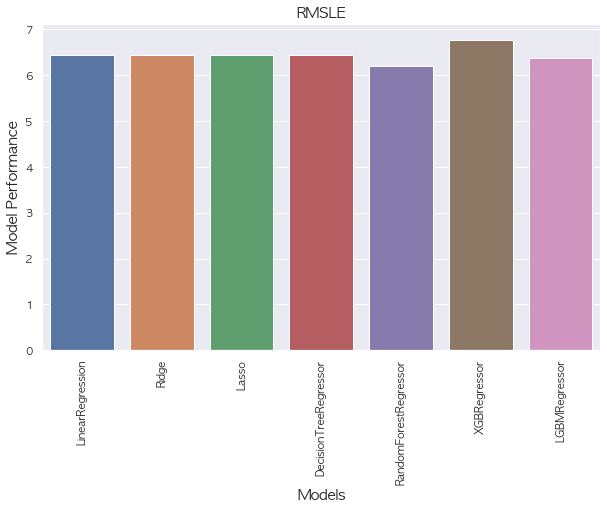

In [37]:
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=result_df['Model'], y=result_df['Score'])
plt.xlabel('Models', fontsize=15)
plt.ylabel('Model Performance', fontsize=15)
plt.title('RMSLE', fontsize=15)
plt.show()

# hyperparameter tuning

In [38]:
X = train.drop(['운송장_건수'],axis=1)
y = train['운송장_건수']

In [39]:
# 첫번째 테스트용으로 사용하고, 실제 학습시에는 K-Fold CV를 사용합니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0xC0FFEE)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# h_train_X > X_train
# h_train_y > y_train
# h_valid_X > X_test
# h_valid_y > y_test


(28515, 11) (3169, 11) (28515,) (3169,)


In [40]:
from optuna.samplers import TPESampler

sampler = TPESampler(seed=10)

def objective(trial):
    dtrain = lgb.Dataset(X_train, label=y_train)
    dtest = lgb.Dataset(X_test, label=y_test)

    param = {
        'objective': 'regression', # 회귀
        'verbose': -1,
        'metric': 'rmse', 
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
    }

    model = lgb.LGBMRegressor(**param)
    lgb_model = model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=25)
    rmse = RMSE(y_test, lgb_model.predict(X_test))
    return rmse
        
study_lgb = optuna.create_study(direction='minimize', sampler=sampler)
study_lgb.optimize(objective, n_trials=100)

[I 2022-06-14 16:34:53,869] A new study created in memory with name: no-name-8db84374-2013-4493-9e0e-1e752782e1a9
[I 2022-06-14 16:34:58,781] Trial 0 finished with value: 6.265832410636873 and parameters: {'max_depth': 13, 'learning_rate': 1.3320229150659043e-08, 'n_estimators': 1938, 'min_child_samples': 76, 'subsample': 0.6315909175774905}. Best is trial 0 with value: 6.265832410636873.
[I 2022-06-14 16:35:01,572] Trial 1 finished with value: 6.265557062762396 and parameters: {'max_depth': 5, 'learning_rate': 1.5430400149097381e-07, 'n_estimators': 2306, 'min_child_samples': 21, 'subsample': 0.4337244827306443}. Best is trial 1 with value: 6.265557062762396.
[I 2022-06-14 16:35:01,880] Trial 2 finished with value: 6.05367405967179 and parameters: {'max_depth': 11, 'learning_rate': 0.005252427629146827, 'n_estimators': 111, 'min_child_samples': 54, 'subsample': 0.8422371309477078}. Best is trial 2 with value: 6.05367405967179.
[I 2022-06-14 16:35:04,310] Trial 3 finished with value: 6

In [41]:
trial = study_lgb.best_trial
trial_params = trial.params
print('Best Trial: score {},\nparams {}'.format(trial.value, trial_params))

Best Trial: score 5.6878066710320265,
params {'max_depth': 10, 'learning_rate': 0.0040441508592481065, 'n_estimators': 2688, 'min_child_samples': 8, 'subsample': 0.4233819317934962}


In [42]:
final_lgb_model = lgb.LGBMRegressor(**trial_params)
final_lgb_model.fit(X_train, y_train)
final_lgb_pred = final_lgb_model.predict(test)

In [43]:
final_lgb_pred

array([7.29747618, 4.60978521, 4.4342672 , ..., 3.48034643, 3.51946757,
       4.43334688])

<BarContainer object of 11 artists>

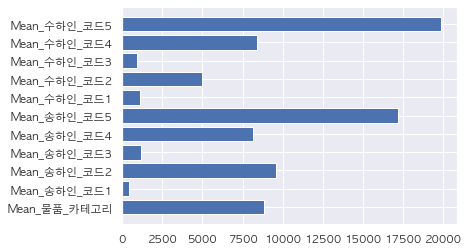

In [44]:
plt.barh(X_train.columns, final_lgb_model.feature_importances_)

In [45]:
final_pred_sub = np.expm1(final_lgb_pred)
final_pred_sub

array([1475.56863325,   99.46256889,   83.29033423, ...,   31.47096902,
         32.76644542,   83.21279587])

In [46]:
sub = pd.read_csv('data/test.csv')
sub_df = pd.DataFrame({'index': sub['index'], '운송장_건수': final_pred_sub})
sub_df

,index,운송장_건수
0,0,1475.568633
1,1,99.462569
2,2,83.290334
3,3,228.541399
4,4,101.339548
...,...,...
7915,7915,510.688908
7916,7916,293.872243
7917,7917,31.470969
7918,7918,32.766445


In [47]:
sub_df.to_csv('submission_lgb_mean.csv', index=False)

In [48]:
sub_df.loc[sub_df.운송장_건수>10000000,'운송장_건수']

62      2.295836e+11
317     2.427916e+07
347     4.742880e+25
590     9.232763e+08
604     1.821228e+07
            ...     
7380    2.314689e+07
7399    9.243610e+08
7460    6.167868e+12
7641    2.705454e+09
7680    1.170839e+09
Name: 운송장_건수, Length: 66, dtype: float64

# 예측 망함